In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env

In [2]:
#read in data from sql
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/logs'
df = pd.read_sql('SELECT * FROM api_access', url)

In [3]:
#split entry data on spaces
df.entry[0].split(' ')

['97.105.19.58',
 '-',
 '-',
 '[16/Apr/2019:19:34:42',
 '+0000]',
 '"GET',
 '/api/v1/sales?page=81',
 'HTTP/1.1"',
 '200',
 '512495',
 '"-"',
 '"python-requests/2.21.0"']

In [4]:
#split whole dataframe
df = df.entry.str.split(' ', expand=True)

In [5]:
#combine end columns together & save back into 11
df[11] = df[11].str.strip('"')

In [6]:
#combine using lambda
df[11] = df.loc[:,11:].apply(lambda rows: ' '.join(rows.values.astype(str)), axis=1).str.replace('None', '').str.strip()

In [7]:
#remove end columns using loc
df = df.loc[:,:11]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,97.105.19.58,-,-,[16/Apr/2019:19:34:42,+0000],"""GET",/api/v1/sales?page=81,"HTTP/1.1""",200,512495,"""-""",python-requests/2.21.0
1,97.105.19.58,-,-,[16/Apr/2019:19:34:42,+0000],"""GET",/api/v1/items,"HTTP/1.1""",200,3561,"""-""",python-requests/2.21.0
2,97.105.19.58,-,-,[16/Apr/2019:19:34:44,+0000],"""GET",/api/v1/sales?page=82,"HTTP/1.1""",200,510103,"""-""",python-requests/2.21.0
3,97.105.19.58,-,-,[16/Apr/2019:19:34:46,+0000],"""GET",/api/v1/sales?page=83,"HTTP/1.1""",200,510003,"""-""",python-requests/2.21.0
4,97.105.19.58,-,-,[16/Apr/2019:19:34:48,+0000],"""GET",/api/v1/sales?page=84,"HTTP/1.1""",200,511963,"""-""",python-requests/2.21.0


In [8]:
#drop other unnecesary columns
df = df.drop(columns=[1,2,4,10])

In [9]:
#rename columns
df = df.rename(columns={0: 'ip', 3: 'timestamp', 5:'request_method', 6: 'request_path', 7:'http_version',
                  8: 'status_code', 9: 'size', 11: 'user_agent'})

In [10]:
#strip extra quotes
df.request_method = df.request_method.str.strip('"')
df.http_version = df.http_version.str.strip('"')

In [11]:
#format timestamp
df.timestamp = df.timestamp.str.strip('[').str.strip(']').str.replace(':', ' ', 1)

In [12]:
df.timestamp = pd.to_datetime(df.timestamp)

In [13]:
# Synthetic data
new = pd.DataFrame([
    ["95.31.18.119", "21/Apr/2019 10:02:41", "GET", "/api/v1/items/", "HTTP/1.1", '200', 1153005, "python-requests/2.21.0"],
    ["95.31.16.121", "17/Apr/2019 19:36:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '301', 1005, "python-requests/2.21.0"],
    ["97.105.15.120", "18/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '301', 2560, "python-requests/2.21.0"],
    ["97.105.19.58", "19/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '200', 2056327, "python-requests/2.21.0"],
], columns=df.columns)

new

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,95.31.18.119,21/Apr/2019 10:02:41,GET,/api/v1/items/,HTTP/1.1,200,1153005,python-requests/2.21.0
1,95.31.16.121,17/Apr/2019 19:36:41,GET,/api/v1/sales?page=79/,HTTP/1.1,301,1005,python-requests/2.21.0
2,97.105.15.120,18/Apr/2019 19:42:41,GET,/api/v1/sales?page=79/,HTTP/1.1,301,2560,python-requests/2.21.0
3,97.105.19.58,19/Apr/2019 19:42:41,GET,/api/v1/sales?page=79/,HTTP/1.1,200,2056327,python-requests/2.21.0


In [14]:
#add to initial dataframe
df = pd.concat([df,new])

In [15]:
df = df.reset_index(drop=True)

In [16]:
df.timestamp = df.timestamp.astype('datetime64')

In [17]:
#make additional size_mb column
df['size_mb'] = df['size'].astype(int) / 1024 / 1024

In [18]:
df= df.set_index('timestamp')

In [59]:
df

,ip,request_method,request_path,http_version,status_code,size_,user_agent,size_mb
timestamp,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753
2019-04-16 19:34:42,97.105.19.58,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396
2019-04-16 19:34:44,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472
2019-04-16 19:34:46,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377
2019-04-16 19:34:48,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246
...,...,...,...,...,...,...,...,...
2019-04-17 12:55:14,97.105.19.58,GET,/api/v1/sales?page=71,HTTP/1.1,200,510166,python-requests/2.21.0,0.486532
2019-04-21 10:02:41,95.31.18.119,GET,/api/v1/items/,HTTP/1.1,200,1153005,python-requests/2.21.0,1.099591
2019-04-17 19:36:41,95.31.16.121,GET,/api/v1/sales?page=79/,HTTP/1.1,301,1005,python-requests/2.21.0,0.000958


In [21]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [25]:
ip_rp = value_counts_and_frequencies(df.request_path)

In [26]:
ip_rp

,count,proba
/api/v1/sales?page=2,709,0.050723
/api/v1/items,464,0.033195
/api/v1/items?page=2,291,0.020818
/api/v1/items?page=3,219,0.015667
/api/v1/stores,162,0.011590
...,...,...
/api/v1,1,0.000072
/api/v1//api/v1/items/next_page,1,0.000072
/api/v1//api/v1/items,1,0.000072
/api/v1/items?page=0,1,0.000072


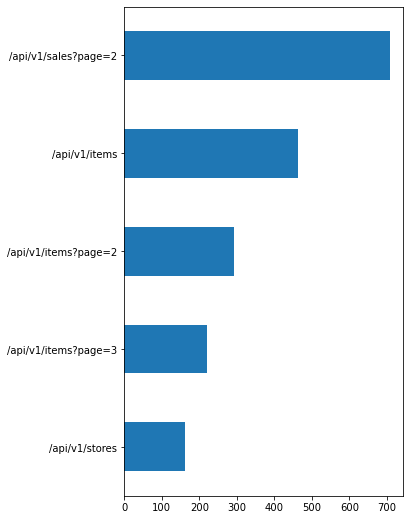

In [39]:
ip_rp['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))
plt.show()

In [30]:
status_given_rp = (
    df.groupby('request_path')
    .status_code.value_counts(normalize=True)
    .rename('proba_status_given_rp')
    .reset_index()
)
status_given_rp.head()

,request_path,status_code,proba_status_given_rp
0,/,200,1.0
1,/api/V1/HiZach!,200,1.0
2,/api/v1,200,1.0
3,/api/v1/,200,1.0
4,/api/v1//api/v1/items,200,1.0


In [31]:
status_given_rp[status_given_rp.status_code != '200']


,request_path,status_code,proba_status_given_rp
10,/api/v1/items,499,0.008621
44,/api/v1/sales?page=115,499,0.016393
65,/api/v1/sales?page=133,499,0.016667
123,/api/v1/sales?page=2,499,0.004231
126,/api/v1/sales?page=21,499,0.013699
131,/api/v1/sales?page=25,499,0.014085
136,/api/v1/sales?page=29,499,0.014493
157,/api/v1/sales?page=47,499,0.014925
182,/api/v1/sales?page=69,499,0.015625
194,/api/v1/sales?page=79/,301,0.666667


### 66% of requests from page 79 result in a redirect.

In [35]:
df.user_agent.value_counts()

python-requests/2.21.0                                                                                                        12005
python-requests/2.20.1                                                                                                         1911
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36"       34
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"                                               8
Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots)"                                                                       7
Slackbot 1.0 (+https://api.slack.com/robots)"                                                                                     6
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36"        4
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, l

In [36]:
ip_ua = value_counts_and_frequencies(df.user_agent)

In [37]:
ip_ua

,count,proba
python-requests/2.21.0,12005,0.858850
python-requests/2.20.1,1911,0.136715
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36""",34,0.002432
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0""",8,0.000572
"Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots)""",7,0.000501
"Slackbot 1.0 (+https://api.slack.com/robots)""",6,0.000429
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36""",4,0.000286
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36""",2,0.000143
Python-urllib/3.7,1,0.000072


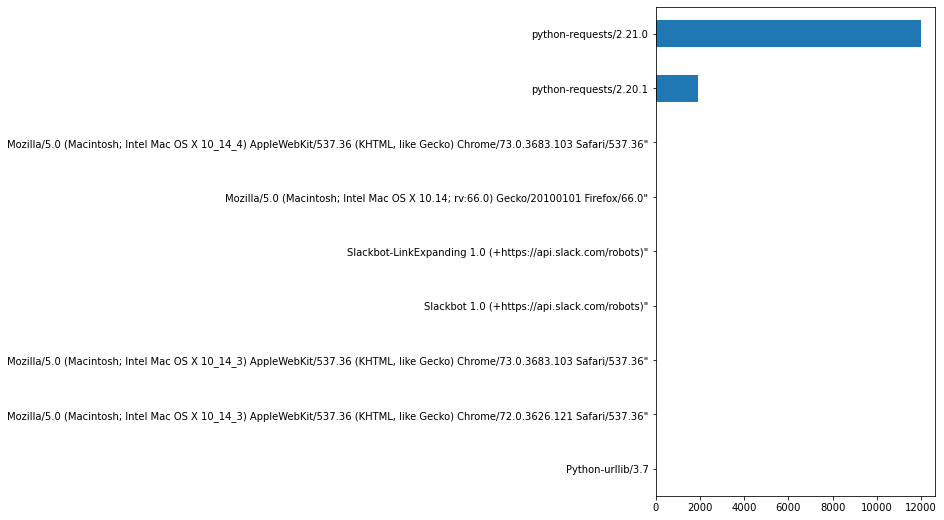

In [41]:
ip_ua['count'].sort_values().tail(10).plot.barh(figsize=(5, 9))
plt.show()

In [42]:
status_given_ua = (
    df.groupby('user_agent')
    .status_code.value_counts(normalize=True)
    .rename('proba_status_given_ua')
    .reset_index()
)
status_given_rp.head()

,request_path,status_code,proba_status_given_rp
0,/,200,1.0
1,/api/V1/HiZach!,200,1.0
2,/api/v1,200,1.0
3,/api/v1/,200,1.0
4,/api/v1//api/v1/items,200,1.0


In [43]:
status_given_ua[status_given_ua.status_code != '200']


,user_agent,status_code,proba_status_given_ua
8,python-requests/2.20.1,499,0.002093
10,python-requests/2.21.0,499,0.001000
11,python-requests/2.21.0,301,0.000167


### small percentage of 499/301 status for user agents that seem to have a large number of request

In [56]:
size_given_ua = (
    df.groupby('user_agent')
    .size_.mean()
    .rename('size_given_ua')
    .reset_index()
)
size_given_ua.head()

,user_agent,size_given_ua
0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,124377.750000
1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,102.000000
2,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,102.000000
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,15121.411765
4,Python-urllib/3.7,162.000000


In [57]:
size_given_ua

,user_agent,size_given_ua
0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; ...,124377.750000
1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,102.000000
2,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3...,102.000000
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...,15121.411765
4,Python-urllib/3.7,162.000000
5,"Slackbot 1.0 (+https://api.slack.com/robots)""",162.000000
6,Slackbot-LinkExpanding 1.0 (+https://api.slack...,71616.428571
7,python-requests/2.20.1,494236.136054
8,python-requests/2.21.0,445116.965598


In [61]:
q1, q3 = df['size_'].quantile([.25, .75]) # get quartiles
iqr = q3 - q1   # calculate interquartile range
lower_bound = q1 - 3 * iqr   # get lower bound
lower_outliers = df[df['size_'] < lower_bound]
print(lower_outliers.to_markdown())

| timestamp           | ip             | request_method   | request_path                            | http_version   |   status_code |   size_ | user_agent                                                                                                                 |     size_mb |
|:--------------------|:---------------|:-----------------|:----------------------------------------|:---------------|--------------:|--------:|:---------------------------------------------------------------------------------------------------------------------------|------------:|
| 2019-04-16 19:34:42 | 97.105.19.58   | GET              | /api/v1/items                           | HTTP/1.1       |           200 |    3561 | python-requests/2.21.0                                                                                                     | 0.00339603  |
| 2019-04-16 19:34:48 | 97.105.19.58   | GET              | /api/v1/stores                          | HTTP/1.1       |           200 |    1328 | pyt

In [62]:
q1, q3 = df['size_'].quantile([.25, .75]) # get quartiles
iqr = q3 - q1   # calculate interquartile range
upper_bound = q3 + 3 * iqr   # get upper bound
upper_outliers = df[df['size_'] > upper_bound]
print(upper_outliers.to_markdown())

| timestamp           | ip           | request_method   | request_path           | http_version   |   status_code |   size_ | user_agent             |   size_mb |
|:--------------------|:-------------|:-----------------|:-----------------------|:---------------|--------------:|--------:|:-----------------------|----------:|
| 2019-04-21 10:02:41 | 95.31.18.119 | GET              | /api/v1/items/         | HTTP/1.1       |           200 | 1153005 | python-requests/2.21.0 |   1.09959 |
| 2019-04-19 19:42:41 | 97.105.19.58 | GET              | /api/v1/sales?page=79/ | HTTP/1.1       |           200 | 2056327 | python-requests/2.21.0 |   1.96107 |


In [67]:
df[(df.ip == '97.105.19.58') & (df.size_ > upper_bound)]

,ip,request_method,request_path,http_version,status_code,size_,user_agent,size_mb
timestamp,,,,,,,,
2019-04-19 19:42:41,97.105.19.58,GET,/api/v1/sales?page=79/,HTTP/1.1,200,2056327,python-requests/2.21.0,1.961066


### request above was the only request from 97.105.19.58 with size > 3 std devs above IQR

In [68]:
df.http_version.value_counts()

HTTP/1.1    13978
Name: http_version, dtype: int64

In [70]:
df.request_method.value_counts()

GET    13978
Name: request_method, dtype: int64